##### Pablo David Minango Negrete
##### RA: 226760
#### Neural Networking using TensorFlow
##### pg. 93 - 99

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

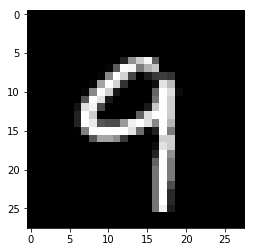

In [3]:
plt.imshow(np.reshape(mnist.train.images[8], [28, 28]), cmap='gray')
plt.show()

In [4]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

In [5]:
# Network Parameters
n_hidden_1 = 10 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [6]:
# TF Graph Input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [7]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [8]:
# Create Model
def neural_net(x):
    # Hidden fully connected layer with 10 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 10 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [9]:
# Construct model
logits = neural_net(X)

In [10]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

### Recommendation from TensorFlow

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

In [11]:
# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.arg_max(logits, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Use `argmax` instead


In [12]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
sess = tf.Session()

In [28]:
# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y:batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y:batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                 "{:.4f}".format(loss) + ", Training  Accuracy= " +\
                 "{:.3f}".format(acc))
    
    print("Optimization Finished!!")
   
    # Calculate accuracy for MNIST test images
    print("\nTesting Accuracy:", \
          sess.run(accuracy, feed_dict={X: mnist.test.images,
                                        Y: mnist.test.labels}))

Step 1, Minibatch Loss= 156.1856, Training  Accuracy= 0.125
Step 100, Minibatch Loss= 0.8100, Training  Accuracy= 0.750
Step 200, Minibatch Loss= 0.7834, Training  Accuracy= 0.773
Step 300, Minibatch Loss= 0.5642, Training  Accuracy= 0.820
Step 400, Minibatch Loss= 0.3817, Training  Accuracy= 0.891
Step 500, Minibatch Loss= 0.4415, Training  Accuracy= 0.898
Optimization Finished!!

Testing Accuracy: 0.8828
